# Converting the execution time in nanoseconds to dataframe

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pandas as pd
import json

# Directory containing the JSON files
directory = './results-csvs'

# Dictionary to store DataFrames
dfs = {}
filenames = []

# Iterate through files ending with .json in the specified directory
counter = 0
for filename in os.listdir(directory):
    if filename.startswith('exec-time-history-') and filename.endswith('.json'):
        counter += 1
        print(f'{counter} > Reading file: {filename.split("history-")[1]}')
        filenames.append(filename.split("history-")[1].split(".json")[0])
        print(filenames[counter-1])
        fp = os.path.join(directory, filename)
        # Read JSON file into a DataFrame
        dfs[str(counter)] = pd.read_json(fp)

1 > Reading file: itc-87_to_nearest-hospital.json
itc-87_to_nearest-hospital
2 > Reading file: itc-87_to_rs-jih.json
itc-87_to_rs-jih
3 > Reading file: itc-87_to_rs-jogja.json
itc-87_to_rs-jogja


In [35]:
def plot_data(df, context):
    # Plot the data as a line graph

    features = [
        'greedy',
        'dijkstra',
        'astar',
        'bfs'
    ]

    plt.figure(figsize=(10, 5))
    plt.plot(df[features])
    plt.grid(True)
    plt.xlabel('N run')
    plt.ylabel('Execution Time (nanoseconds)')
    plt.title('Time Elapsed Over Time (%s)' % context.replace('_to_', ' To '))
    plt.legend(df.columns)
    # Calculate average execution time
    avg_execution_time = df[features].mean()
    # Add average execution time to the labels
    labels = [f'{col} (Avg: {avg:,.2f} ns)' for col, avg in zip(df.columns, avg_execution_time)]
    plt.legend(labels, loc='upper right')
    plt.show()


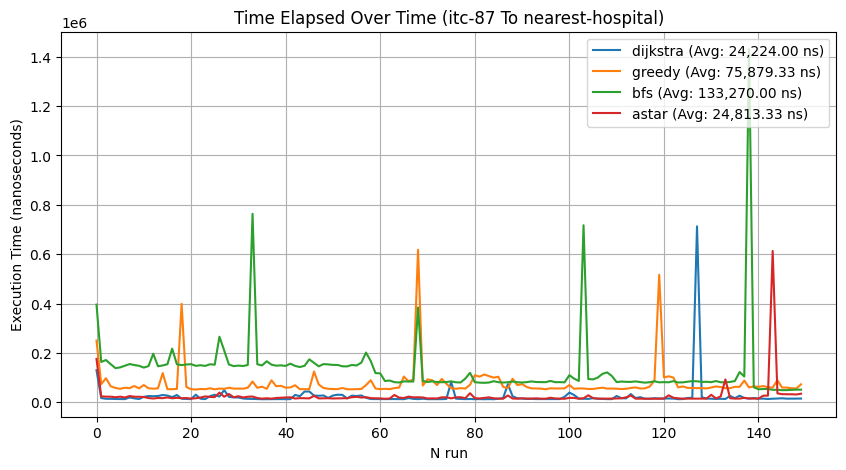

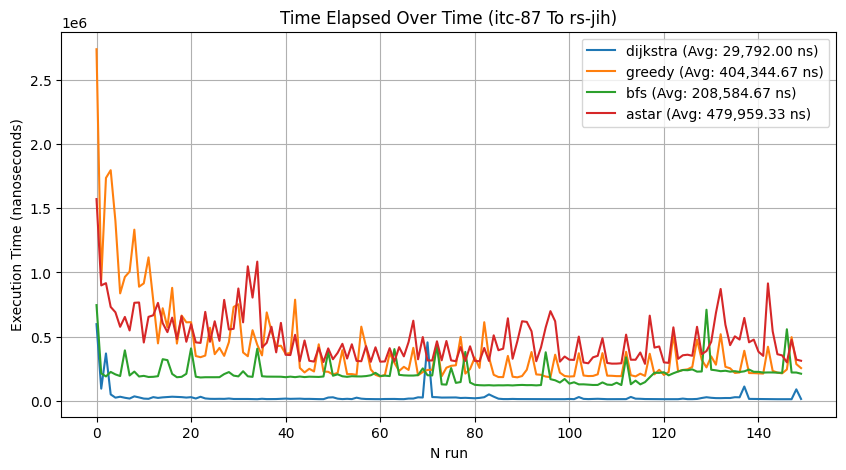

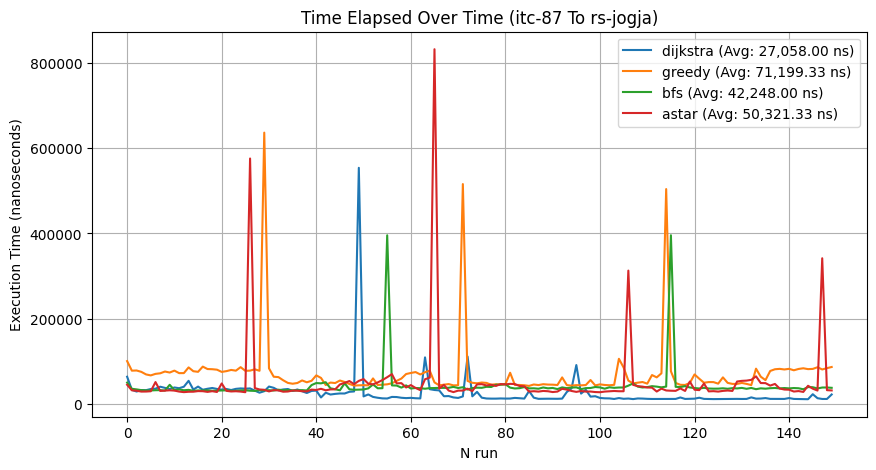

In [36]:
# Plot the data by iterating through the DataFrames and setting context from filenames
for key, df in dfs.items():
    plot_data(df, filenames[int(key)-1])

In [37]:
# Convert to csv
for key, df in dfs.items():
    df.to_csv(f'./results-csvs/{filenames[int(key)-1]}.csv', index=False)